<h4 style="margin:0;"><b>Maciej Bogusławski (331362), Hubert Kaczyński (331386)</b></h4>
<h1 style="margin:0;"><b>Inżynieria Uczenia Maszynowego</b></h1>
<p style="margin-top:0.4rem;"><b>Projekt 6. Etap 2. Analiza danych</b></p>

Niniejszy notatnik stanowi element drugiego etapu projektu realizowanego w ramach przedmiotu Inżynieria Uczenia Maszynowego w realizacji 25Z. Celem niniejszego notatnika jest ponowne przeprowadzenie eksploracyjnej analizy danych, analogicznie do pierwszego etapu projektu, w celu zbadania różnic między dotychczas wykorzystywanym zbiorem danych a nowym zestawem danych uzyskanym w ramach przejścia do kolejnego etapu implementacji. Eksploracyjna analiza danych pozwoli potwierdzić poprawność zdefiniowanych uprzedmio założeń oraz celów, a także dalsze istnienie zaobserwowanych trendów oraz korelacji. Dodatkowy cel niniejszego notatnika stanowi przedstawienie procesu trenowania modelu bazowego oraz modelu zaawansowanego. Ostatecznie wybrane modele są eksportowane jako obiekty Pipeline do plików .pkl, które następnie użyte będą podczas implementacji mikroserwisu.

### **Podsumowanie kluczowych różnic w danych**
Główną różnicę w danych analizowanych w ramach etapu drugiego w stosunku do starych danych stanowi przede wszystkim znacząco mniejsza liczba brakujących wartości we wszystkich kolumnach, z wyjątkiem dwóch kolumn całkowicie pozbawionych obserwacji, oraz większy rozmiar danych - po odflitrowaniu potencjalnie nieprawidłowych ofert zgodnie z pierwotnymi regułami oraz ograniczeniami, nowe dane zawierają o 25.1% więcej wierszy niż stare dane. Zmiany te nie wpływają jednak na obecność zaobserowanych w ramach etapu pierwszego trendów, prezentując praktycznie identyczne korelacje, umożliwiając w ten sposób budowę modeli bez konieczności modyfikacji założeń z etapu pierwszego.


## **Eksploracyjna analiza nowego zestawu danych**

### **Podsumowanie zbioru danych**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv("data/listings.csv", low_memory=False)
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69998,https://www.nocarz.pl/rooms/69998,20250307145417,2025-03-10,city scrape,Hideaway Soulful Loft,"Minimum 32 days maximum 11 months,<br />a uniq...",( soho-chic bohemian neighborhood of the city ...,https://a0.muscache.com/pictures/6d4007c1-f223...,353156,https://www.nocarz.pl/users/show/353156,Lor,2011-01-19,"Palma, Spain",Wanderlust Enthusiast and Eco-Entrepreneur Adv...,within an hour,100%,91%,t,https://a0.muscache.com/im/pictures/user/bedd4...,https://a0.muscache.com/im/pictures/user/bedd4...,NaN,2.0,5.0,"['email', 'phone']",t,t,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,NaN,39.56987,2.65464,Entire loft,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Refrigerator"", ""Private entrance"", ""Cooking ...",$50.00,32,250,32,32,1125,1125,32.0,1125.0,NaN,t,0,0,0,0,2025-03-10,265,3,0,0,3,192,9600.0,2012-01-24,2024-10-26,4.95,4.92,4.93,4.95,4.97,4.89,4.81,NaN,f,2,2,0,0,1.66
1,106833,https://www.nocarz.pl/rooms/106833,20250307145417,2025-03-07,city scrape,Villa with a big pool in Mallorca,NaN,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,551974,https://www.nocarz.pl/users/show/551974,Xisco,2011-05-02,"Palma de Mallorca, Spain",I'm Xisco. I love Mallorcan way of life.,within a few hours,100%,100%,f,https://a0.muscache.com/im/users/551974/profil...,https://a0.muscache.com/im/users/551974/profil...,NaN,1.0,1.0,"['email', 'phone']",t,t,NaN,Sant Llorenç des Cardassar,NaN,39.61458,3.30100,Entire villa,Entire home/apt,4,1.0,1 bath,2.0,4.0,"[""Smoking allowed"", ""Heating"", ""Outdoor furnit...",$200.00,5,365,5,5,365,365,5.0,365.0,NaN,t,0,0,0,89,2025-03-07,27,8,0,24,8,80,16000.0,2012-06-05,2024-09-11,4.89,4.81,4.81,4.89,4.92,4.52,4.63,ET/1961,f,1,1,0,0,0.17
2,164185,https://www.nocarz.pl/rooms/164185,20250307145417,2025-03-08,city scrape,Corazón de Palma-Habitación con baño privado.,Location-location-location.<br />The penthouse...,One of the best central locations in the city ...,https://a0.muscache.com/pictures/1070849/96c7b...,33523826,https://www.nocarz.pl/users/show/33523826,Farhang,2015-05-16,"Portals Nous, Spain",Young in spirit. Open in mind..clean in heart...,NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,NaN,5.0,9.0,"['email', 'phone']",t,t,"Palma de Mallorca, Balearic Islands, Spain",Palma de Mallorca,NaN,39.57271,2.64448,Private room in guest suite,Private room,2,1.0,1 private bath,1.0,1.0,"[""Portable fans"", ""Heating - split type ductle...",$47.00,5,1125,5,5,1125,1125,5.0,1125.0,NaN,t,28,45,59,307,2025-03-08,153,14,0,241,13,140,6580.0,2011-08-16,2025

In [3]:
print(f"Size of the dataset: {df.shape[0]} rows, {df.shape[1]} columns")
print("Names of the columns:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

Size of the dataset: 16404 rows, 79 columns
Names of the columns:
1. id
2. listing_url
3. scrape_id
4. last_scraped
5. source
6. name
7. description
8. neighborhood_overview
9. picture_url
10. host_id
11. host_url
12. host_name
13. host_since
14. host_location
15. host_about
16. host_response_time
17. host_response_rate
18. host_acceptance_rate
19. host_is_superhost
20. host_thumbnail_url
21. host_picture_url
22. host_neighbourhood
23. host_listings_count
24. host_total_listings_count
25. host_verifications
26. host_has_profile_pic
27. host_identity_verified
28. neighbourhood
29. neighbourhood_cleansed
30. neighbourhood_group_cleansed
31. latitude
32. longitude
33. property_type
34. room_type
35. accommodates
36. bathrooms
37. bathrooms_text
38. bedrooms
39. beds
40. amenities
41. price
42. minimum_nights
43. maximum_nights
44. minimum_minimum_nights
45. maximum_minimum_nights
46. minimum_maximum_nights
47. maximum_maximum_nights
48. minimum_nights_avg_ntm
49. maximum_nights_avg_ntm
50

W ramach procesu wnioskowania o dane dotyczące działalności firmy Nocarz otrzymano plik CSV listings.csv zawierający 16404 wiersze oraz 79 kolumn - obie te wartości nie zmieniły się w stosunku do poprzedniego zbioru danych. Każdy wiersz w zbiorze reprezentuje jedną ofertę w danym momencie czasu, zaś kolumny przedstawiają różnorodne elementy tej oferty, dotyczące m.in. lokalizacji, typu nieruchomości, udogodnień, liczby pokoi, informacje dotyczące właścicieli, takie jak średni czas, w jakim oferent odpowiada na zapytania potencjalnych klientów czy średnia ocena jakości komunikacji z oferentem, informacje dotyczące ocen i recenzji lokalu, a także dane o dostępności i historii rezerwacji. 

### **Analiza braków danych**

In [4]:
df_summary = pd.DataFrame(
    {
        "column": df.columns,
        "dtype": df.dtypes.values,
        "num_nulls": df.isnull().sum().values,
        "perc_nulls": (df.isnull().mean() * 100).round(2).values,
    }
)

df_summary.style.background_gradient(
    gmap=df_summary["perc_nulls"], cmap="RdYlGn_r"
)

,column,dtype,num_nulls,perc_nulls
0,id,int64,0,0.000000
1,listing_url,object,0,0.000000
2,scrape_id,int64,0,0.000000
3,last_scraped,object,0,0.000000
4,source,object,0,0.000000
5,name,object,0,0.000000
6,description,object,501,3.050000
7,neighborhood_overview,object,10386,63.310000
8,picture_url,object,0,0.000000
9,host_id,int64,0,0.000000


Otrzymane w ramach etapu drugiego dane cechują się dużo niższym odsetkiem brakujących wartości. Podczas gdy uprzednio każda z 79 kolumn w otrzymanym zbiorze danych zawierała pewien odsetek wartości `null`, obecnie aż 40 kolumn nie zawiera żadnej pustej wartości. Dwie kolumny, `neighbourhood_group_cleansed` oraz `calendar_updated`, ponownie nie zawierają żadnych wartości, nie są zatem w żaden sposób użyteczne na potrzeby zadania.

#### **Obsługa braków danych**
Wiersze zawierajace braki w kolumnie przyjętej zmiennej docelowej (kolumnie `price`), stanowią około 8,43% wszystkich wierszy, wykazując znaczącą poprawę względem danych z etapu pierwszego, w których brakujące wartości stanowiły aż 26,96% wszystkich cen. W ramach przyjętej strategii, obserwacje te zostaną usunięte. W przypadku braków w rozważanych kolumnach numerycznych użyta zostanie imputacja medianą, natomiast w przypadku cech kategorialnych brakujące wartości zostaną zastąpione najczęściej występującą wartością.

### **Analiza zmiennej docelowej**
Zakłada się, iż kolumna `price`, stanowiąca zmienną docelową, reprezentuje stawkę bazową za jedną noc w dolarach. W otrzymanych danych cecha ta ma format tekstowy i wymaga konwersji na typ numeryczny.

In [7]:
def convert_price(price):
    if isinstance(price, str):
        return float(price.replace("$", "").replace(",", ""))
    return price


df["price_numeric"] = df["price"].apply(convert_price)
df[["price", "price_numeric"]].head(10)

,price,price_numeric
0,$50.00,50.0
1,$200.00,200.0
2,$47.00,47.0
3,$70.00,70.0
4,$150.00,150.0
5,$100.00,100.0
6,$200.00,200.0
7,$59.00,59.0
8,$196.00,196.0
9,$70.00,70.0


In [8]:
print(
    f"Number of listings with price < $2000: {df[df['price_numeric'] < 2000].shape[0]}"
)
print(
    f"Number of listings with price >= $2000 and <= $7000: {df[(df['price_numeric'] >= 2000) & (df['price_numeric'] <= 7000)].shape[0]}"
)
print(
    f"Number of listings with price > $7000: {df[df['price_numeric'] > 7000].shape[0]}"
)
print(
    f"Number of listings with price exactly $9999: {df[df['price_numeric'] == 9999].shape[0]}"
)
print(
    f"Number of listings with price exactly $10000: {df[df['price_numeric'] == 10000].shape[0]}"
)
print(
    f"Number of listings with price > $10000: {df[df['price_numeric'] > 10000].shape[0]}"
)

df["price_numeric"].describe()

Number of listings with price < $2000: 13500
Number of listings with price >= $2000 and <= $7000: 92
Number of listings with price > $7000: 1429
Number of listings with price exactly $9999: 135
Number of listings with price exactly $10000: 616
Number of listings with price > $10000: 13


count    15021.000000
mean      1174.972039
std       2740.236465
min         10.000000
25%        135.000000
50%        212.000000
75%        419.000000
max      24164.000000
Name: price_numeric, dtype: float64

In [9]:
pd.set_option("display.max_rows", False)

df[(df["price_numeric"] < 30) | (df["price_numeric"] > 9999)][
    ["name", "price_numeric", "bathrooms", "bedrooms", "beds", "property_type"]
].sort_values(by="price_numeric")

,name,price_numeric,bathrooms,bedrooms,beds,property_type
3856,Casa Font de Sa Cala,10.0,3.0,3.0,6.0,Entire chalet
3678,Villa Cati,10.0,2.0,3.0,4.0,Entire villa
2773,300qm Ferienvilla mit Turm - nur 15m bis zum M...,12.0,2.5,4.0,6.0,Entire home
11347,Luminosa Habitación en Palma,18.0,1.0,3.0,3.0,Private room in rental unit
15013,Habitación Arenal,20.0,1.5,1.0,1.0,Private room in rental unit
94,Quite and brightly single room.,21.0,1.5,1.0,1.0,Private room in home
13349,Room for 1 in Arenal,21.0,1.5,1.0,1.0,Private room in rental unit
16362,"Habitación 2 con baño compartido, en piso Aven...",22.0,1.0,4.0,1.0,Private room in rental unit
13058,Simple room for 2,22.0,1.0,1.0,2.0,Private room in rental unit
...,...,...,...,...,...,...


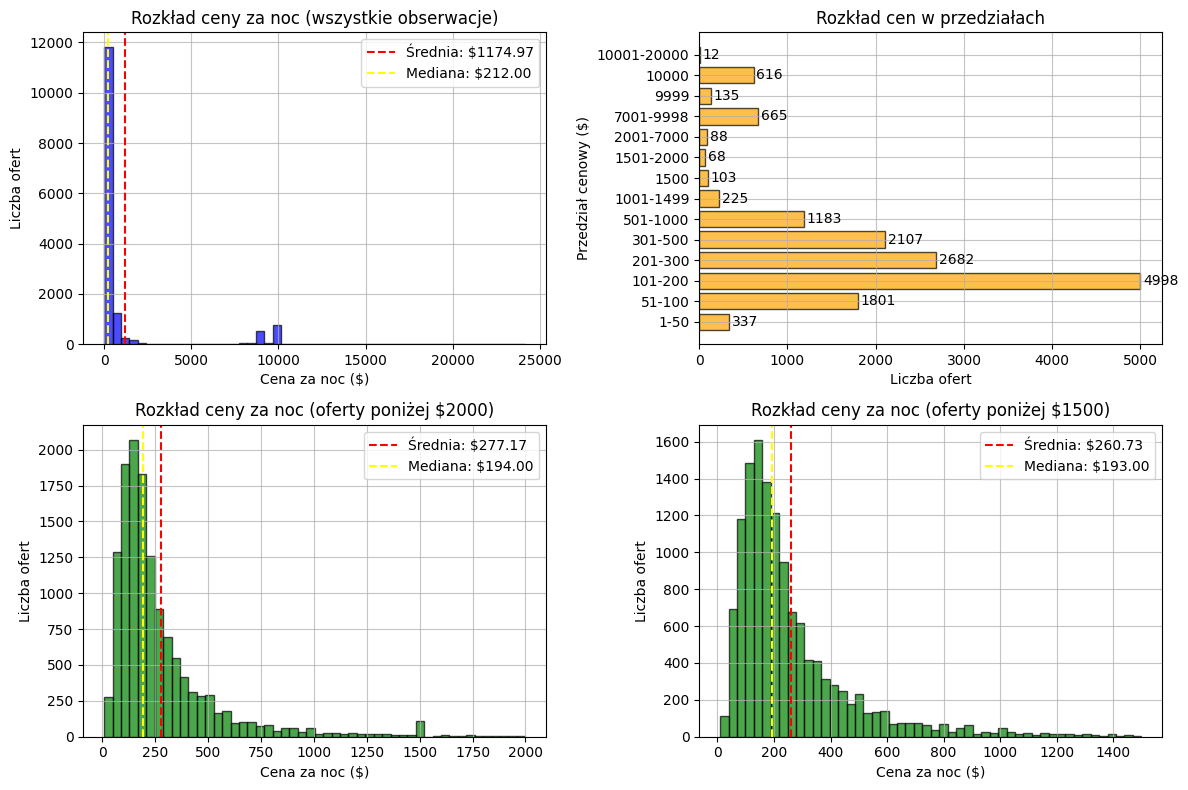

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax1 = axes[0, 0]

price_data = df["price_numeric"].dropna()
ax1.hist(price_data, bins=50, color="blue", edgecolor="black", alpha=0.7)
ax1.set_xlabel("Cena za noc ($)")
ax1.set_ylabel("Liczba ofert")
ax1.set_title("Rozkład ceny za noc (wszystkie obserwacje)")
ax1.grid(alpha=0.75)
ax1.axvline(
    price_data.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_data.mean():.2f}",
)
ax1.axvline(
    price_data.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_data.median():.2f}",
)
ax1.legend()

ax2 = axes[0, 1]
price_bins = [
    0,
    50,
    100,
    200,
    300,
    500,
    1000,
    1499,
    1500,
    2000,
    7000,
    9998,
    9999,
    10000,
    20000,
]
price_counts = pd.cut(price_data, bins=price_bins).value_counts().sort_index()
ax2.barh(
    range(len(price_counts)),
    price_counts.values,
    color="orange",
    edgecolor="black",
    alpha=0.7,
)
ax2.set_yticks(range(len(price_counts)))
ax2.set_yticklabels(
    [
        (
            f"{price_bins[i]+1}-{price_bins[i+1]}"
            if price_bins[i] + 1 != price_bins[i + 1]
            else f"{price_bins[i]+1}"
        )
        for i in range(len(price_bins) - 1)
    ]
)
ax2.set_xlabel("Liczba ofert")
ax2.set_ylabel("Przedział cenowy ($)")
ax2.set_title("Rozkład cen w przedziałach")
for i, v in enumerate(price_counts.values):
    ax2.text(v + 30, i, str(v), color="black", va="center")
ax2.grid(alpha=0.75)

ax3 = axes[1, 0]
price_filtered = price_data[price_data < 2000]
ax3.hist(price_filtered, bins=50, color="green", edgecolor="black", alpha=0.7)
ax3.set_xlabel("Cena za noc ($)")
ax3.set_ylabel("Liczba ofert")
ax3.set_title("Rozkład ceny za noc (oferty poniżej $2000)")
ax3.grid(alpha=0.75)
ax3.axvline(
    price_filtered.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_filtered.mean():.2f}",
)
ax3.axvline(
    price_filtered.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_filtered.median():.2f}",
)
ax3.legend()

ax4 = axes[1, 1]
price_filtered = price_data[price_data < 1500]
ax4.hist(price_filtered, bins=50, color="green", edgecolor="black", alpha=0.7)
ax4.set_xlabel("Cena za noc ($)")
ax4.set_ylabel("Liczba ofert")
ax4.set_title("Rozkład ceny za noc (oferty poniżej $1500)")
ax4.grid(alpha=0.75)
ax4.axvline(
    price_filtered.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_filtered.mean():.2f}",
)
ax4.axvline(
    price_filtered.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_filtered.median():.2f}",
)
ax4.legend()

plt.tight_layout()
plt.show()

Analogicznie do etapu pierwszego, analiza otrzymanych danych pod kątem wartości zmiennej docelowej `price` wykazuje często pojawiające się anomalie cenowe, takie jak oferta wynajem całego domku letniskowego z sześcioma łóżkami za 10 dolarów za noc bądź domu z jedną łazienką za ponad 10 000 dolarów. Wyraźnie widoczna na wykresach bardzo mała liczba ofert między kwotą 2000 a 7000 dolarów implikuje, iż oferty pojawiające się w przedziale cenowym $7000-$10000 nie stanowią prawdziwych reprezentatywnych ofert, a wiersze te są raczej wynikiem błędu, niepoprawnego oznaczenia danych (np. poprzez podanie ceny za tydzień, a nie jedną noc) lub podania zaporowej ceny przez właściciela, aby w praktyce uniemożliwić wynajem lokalu. Ostatnie zjawisko stanowi główny temat innego projektu w ramach przedmiotu Inżynieria Uczenia Maszynowego (temat 1). Szczegółowe wykrywanie obecności tego fenomenu wykracza poza zakres niniejszego projektu. Podejrzenia dotyczące występowania tego zjawiska wzmaga fakt, iż 49.38% ofert o wartości 2000 dolarów lub wyższej mają wartość dokładnie 9999 lub 10000 dolarów, sugerując, iż są to wartości domyślne (placeholdery), a nie prawdziwe ceny. Podobnie, nadnaturalnie duża liczba ofert o cenie za noc wynoszącej dokładnie $1500 sugeruje, iż jest to domyślna, zaporowa wartość, niereprezentująca ceny rynkowej. Biorąc pod uwagę te obserwacje, na potrzeby dalszej analizy danych oferty o wartości dokładnie 1500 dolarów i wyższych zostały potraktowane jako anomalie i odfiltrowane. W ten sposób uzyskano 13333 obserwacje o średniej cenie w wysokości $260.73. Liczba uzyskanych w ten sposób obserwacji wzrosła o 25.1% w stosunku do starych danych analizowanych w ramach etapu pierwszego w tym kroku analizy.

### **Analiza rozkładów atrybutów**
Podstawowe cechy nieruchomości są obszernie opisane w otrzymanych danych. Wśród potencjalnie cennych informacji wyróżnić można choćby liczbę sypialni (kolumna `bedrooms`), liczbę łóżek (kolumna `beds`) oraz liczbę łazienek (kolumna `bathrooms`). Kluczową informacją dla potencjalnych gości jest również maksymalna liczba osób, które mogą nocować w lokalu (kolumna `accommodates`), a także typ wynajmowanego pokoju (`room_type`) oraz typ nieruchomości (`property_type`). Cenną informację może stanowić kolumna `amenities`, zawierającą listę udogodnień dostępnych w wynajmowanej nieruchomości, takich jak lodówka, WiFi czy klimatyzacja. W ramach otrzymanych danych nie uwzględniono natomiast informacji o zasadach pobytu dotyczących zwierząt, dzieci, palenia czy hałasu, a także o dostępności dla osób niepełnosprawnych czy starszych, które zawarto we wniosku o dane dotyczące działalności firmy, zatem przyjęto, iż dane te nie są zbierane przez serwis Nocarz. Ten fragment notatnika skupi się na przedstawieniu rozkładu potencjalnie cennych atrybutów, a także na przedstawieniu zależności ceny od wybranych cech.

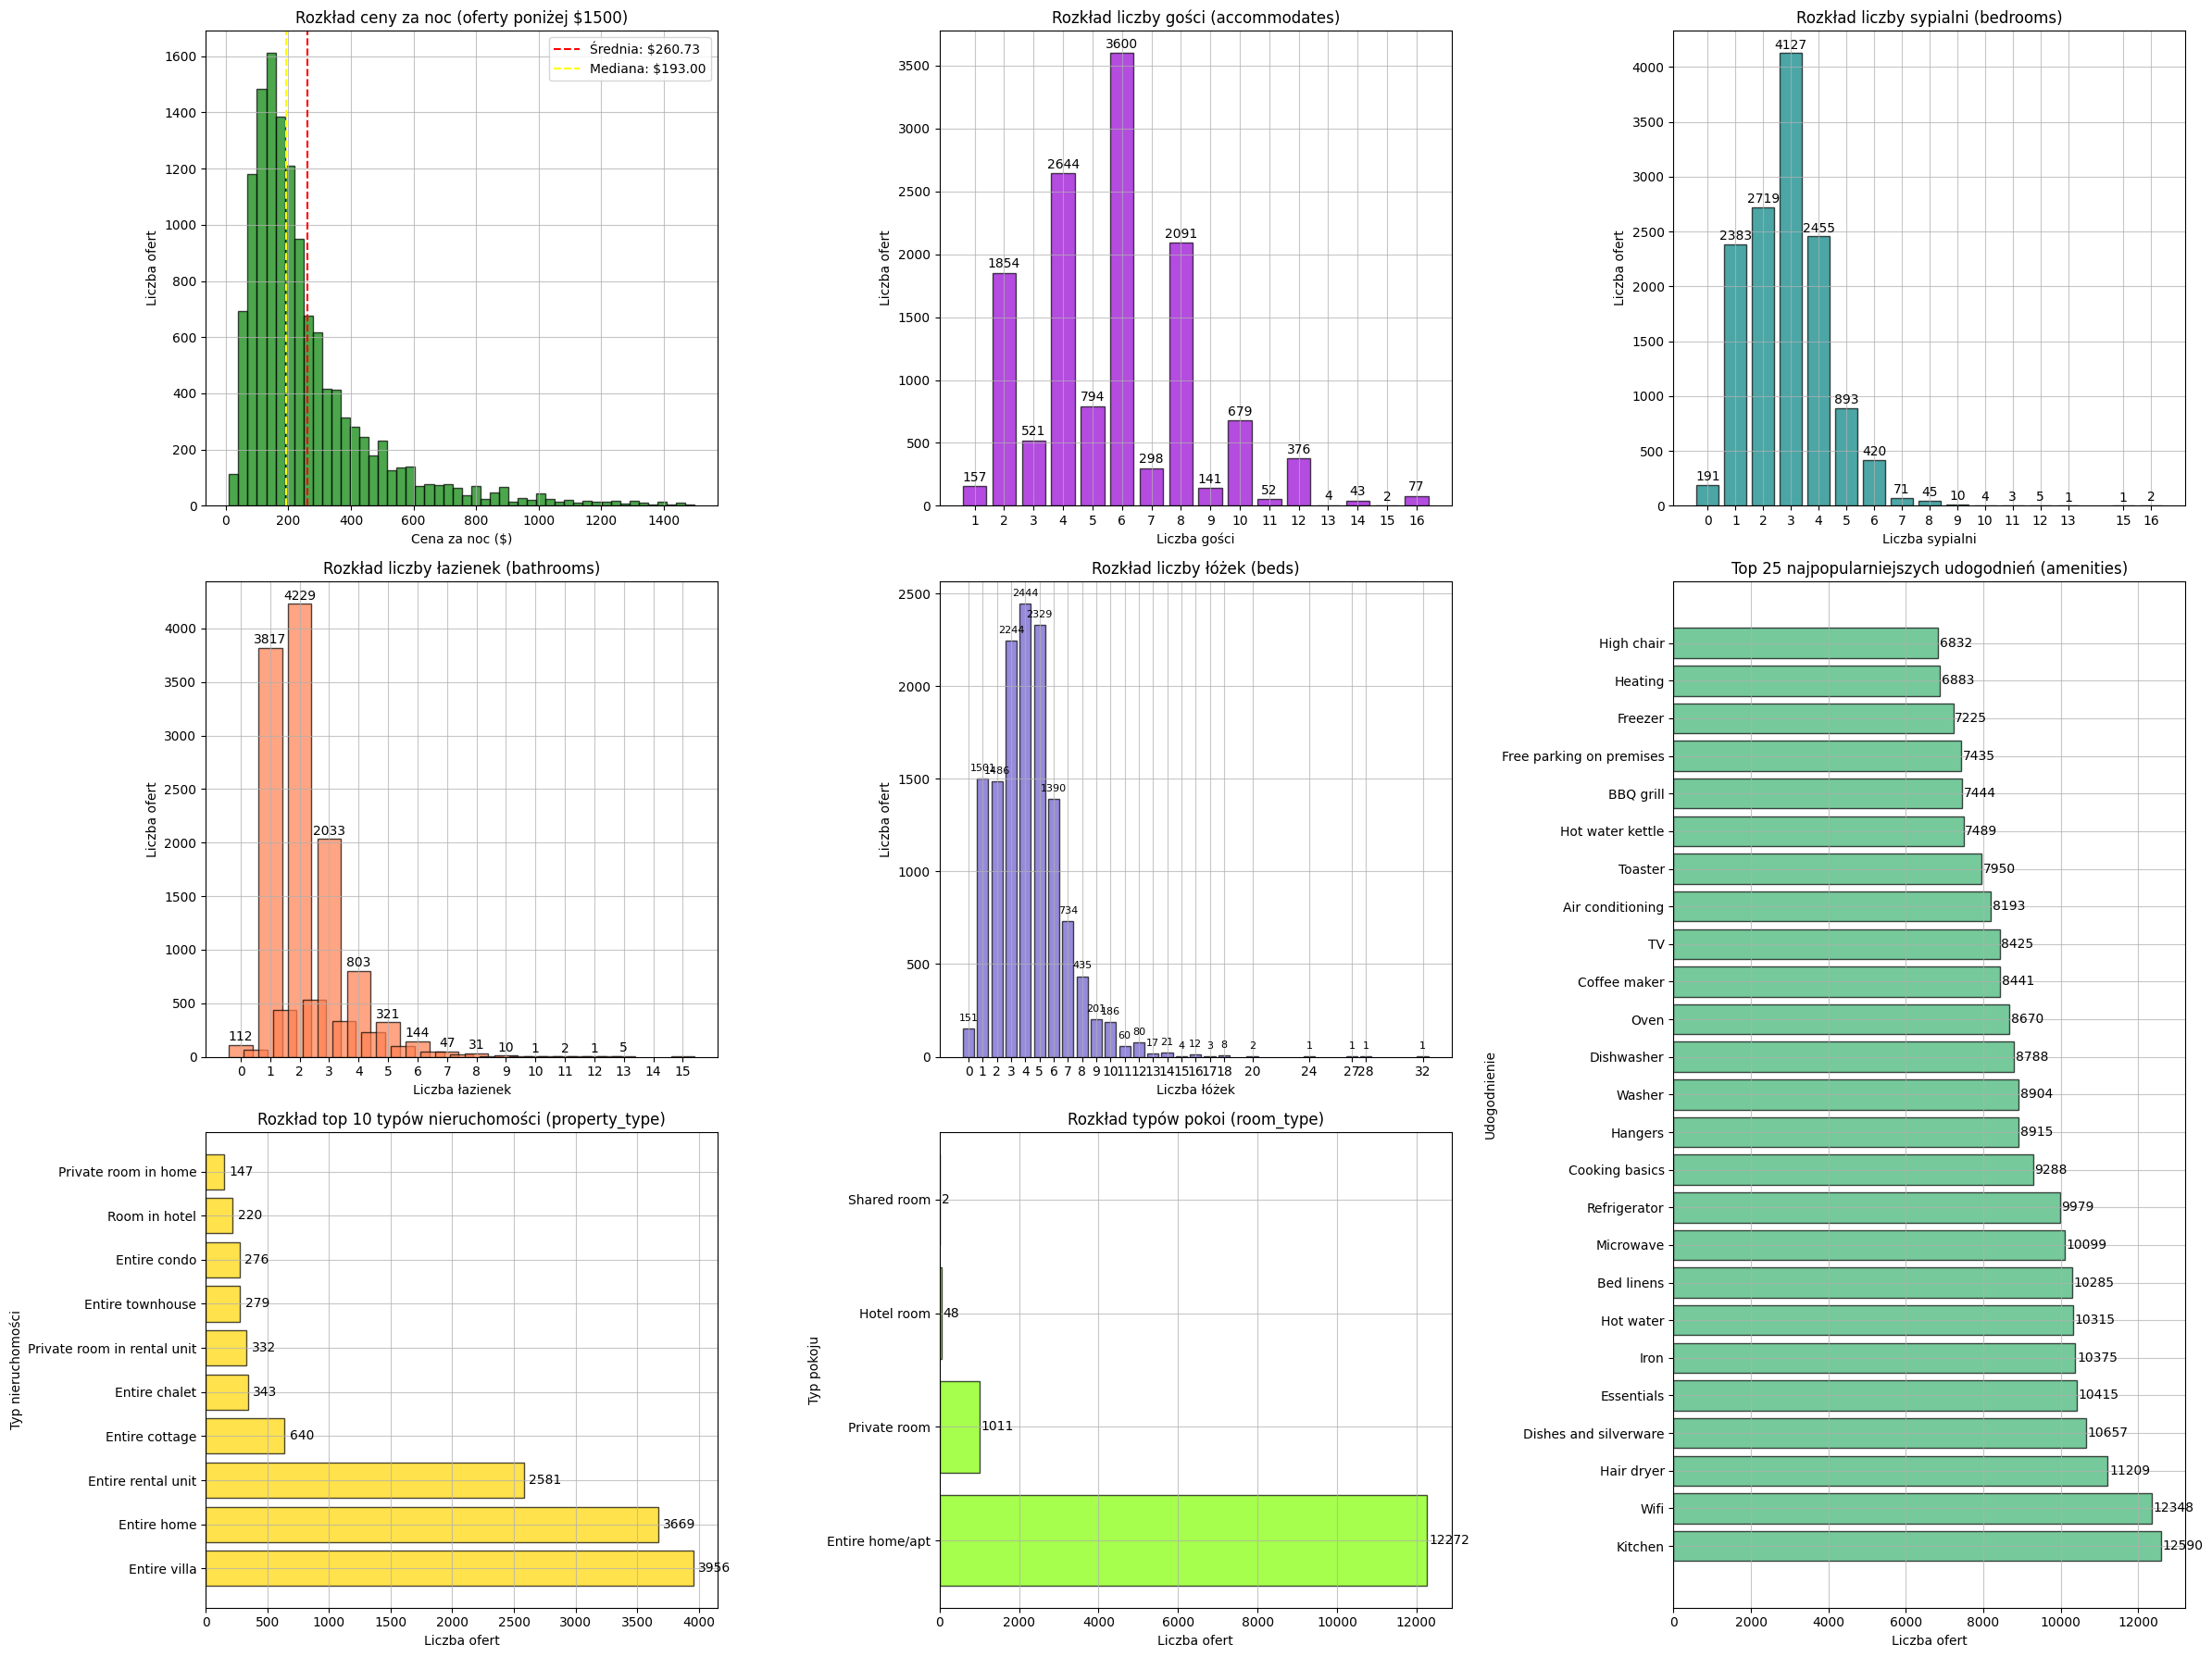

In [13]:
import ast

df_clean = df[
    df["price_numeric"].notna() & (df["price_numeric"] < 1500)
].copy()

fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(3, 3)

ax1 = fig.add_subplot(gs[0, 0])
price_filtered = price_data[price_data < 1500]
ax1.hist(price_filtered, bins=50, color="green", edgecolor="black", alpha=0.7)
ax1.set_xlabel("Cena za noc ($)")
ax1.set_ylabel("Liczba ofert")
ax1.set_title("Rozkład ceny za noc (oferty poniżej $1500)")
ax1.grid(alpha=0.75)
ax1.axvline(
    price_filtered.mean(),
    color="red",
    linestyle="dashed",
    label=f"Średnia: ${price_filtered.mean():.2f}",
)
ax1.axvline(
    price_filtered.median(),
    color="yellow",
    linestyle="dashed",
    label=f"Mediana: ${price_filtered.median():.2f}",
)
ax1.legend()

ax2 = fig.add_subplot(gs[0, 1])
accomodates_counts = df_clean["accommodates"].value_counts().sort_index()
ax2.bar(
    accomodates_counts.index.to_numpy(),
    accomodates_counts.to_numpy(),
    color="darkviolet",
    edgecolor="black",
    alpha=0.7,
)
ax2.set_xticks(accomodates_counts.index.to_numpy())
ax2.set_xlabel("Liczba gości")
ax2.set_ylabel("Liczba ofert")
ax2.set_title("Rozkład liczby gości (accommodates)")
ax2.grid(alpha=0.7)
for i, v in enumerate(accomodates_counts.to_numpy()):
    ax2.text(
        accomodates_counts.index.to_numpy()[i], v + 40, str(v), color="black", ha="center"
    )

ax3 = fig.add_subplot(gs[0, 2])
bedrooms_counts = df_clean["bedrooms"].value_counts().sort_index()
ax3.bar(
    bedrooms_counts.index.to_numpy(),
    bedrooms_counts.to_numpy(),
    color="teal",
    edgecolor="black",
    alpha=0.7,
)
ax3.set_xticks(bedrooms_counts.index.to_numpy())
ax3.set_xlabel("Liczba sypialni")
ax3.set_ylabel("Liczba ofert")
ax3.set_title("Rozkład liczby sypialni (bedrooms)")
ax3.grid(alpha=0.7)
for i, v in enumerate(bedrooms_counts.to_numpy()):
    ax3.text(
        bedrooms_counts.index.to_numpy()[i], v + 40, str(v), color="black", ha="center"
    )

ax4 = fig.add_subplot(gs[1, 0])
bathrooms_counts = df_clean["bathrooms"].value_counts().sort_index()
ax4.bar(
    bathrooms_counts.index.to_numpy(),
    bathrooms_counts.to_numpy(),
    color="coral",
    edgecolor="black",
    alpha=0.7,
)
ax4.set_xticks(range(0, int(bathrooms_counts.index.max()) + 1))
ax4.set_xlabel("Liczba łazienek")
ax4.set_ylabel("Liczba ofert")
ax4.set_title("Rozkład liczby łazienek (bathrooms)")
ax4.grid(alpha=0.7)
for i, v in enumerate(bathrooms_counts.values[::2]):
    ax4.text(
        bathrooms_counts.index[i * 2],
        v + 40,
        str(v),
        color="black",
        ha="center",
    )

ax5 = fig.add_subplot(gs[1, 1])
beds_counts = df_clean["beds"].value_counts().sort_index()
ax5.bar(
    beds_counts.index.to_numpy(),
    beds_counts.to_numpy(),
    color="slateblue",
    edgecolor="black",
    alpha=0.7,
)
ax5.set_xticks(beds_counts.index.to_numpy())
ax5.set_xlabel("Liczba łóżek")
ax5.set_ylabel("Liczba ofert")
ax5.set_title("Rozkład liczby łóżek (beds)")
ax5.grid(alpha=0.7)
for i, v in enumerate(beds_counts.to_numpy()):
    ax5.text(
        beds_counts.index.to_numpy()[i],
        v + 40,
        str(v),
        color="black",
        ha="center",
        fontsize=8,
    )

ax6 = fig.add_subplot(gs[2, 1])
room_type_counts = df_clean["room_type"].value_counts()
ax6.barh(
    room_type_counts.index.to_numpy(),
    room_type_counts.to_numpy(),
    color="chartreuse",
    edgecolor="black",
    alpha=0.7,
)
ax6.set_xlabel("Liczba ofert")
ax6.set_ylabel("Typ pokoju")
ax6.set_title("Rozkład typów pokoi (room_type)")
ax6.grid(alpha=0.7)
for i, v in enumerate(room_type_counts.to_numpy()):
    ax6.text(v + 40, i, str(v), color="black", va="center")

ax7 = fig.add_subplot(gs[2, 0])
property_type_counts = df_clean["property_type"].value_counts().head(10)
ax7.barh(
    property_type_counts.index.to_numpy(),
    property_type_counts.to_numpy(),
    color="gold",
    edgecolor="black",
    alpha=0.7,
)
ax7.set_xlabel("Liczba ofert")
ax7.set_ylabel("Typ nieruchomości")
ax7.set_title("Rozkład top 10 typów nieruchomości (property_type)")
ax7.grid(alpha=0.7)
for i, v in enumerate(property_type_counts.to_numpy()):
    ax7.text(v + 40, i, str(v), color="black", va="center")

ax8 = fig.add_subplot(gs[1:, 2])
df_clean["amenities_list"] = df_clean["amenities"].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else []
)
amenities_exploded = df_clean["amenities_list"].explode()
top_amenities = amenities_exploded.value_counts().head(25)
ax8.barh(
    top_amenities.index.to_numpy(),
    top_amenities.to_numpy(),
    color="mediumseagreen",
    edgecolor="black",
    alpha=0.7,
)

ax8.set_xlabel("Liczba ofert")
ax8.set_ylabel("Udogodnienie")
ax8.set_title("Top 25 najpopularniejszych udogodnień (amenities)")
ax8.grid(alpha=0.7)
for i, v in enumerate(top_amenities.to_numpy()):
    ax8.text(v + 40, i, str(v), color="black", va="center")


plt.tight_layout()

Rozkłady cech nieruchomości po odfiltrowaniu potencjalnie błędnych obserwacji w nowych danych prezentują jednakowe tendencje oraz trendy co dane z etapu pierwszego. Rozkłady cech opisujących pojemność nieruchomości są stosunkowo symetryczne z niewielką liczbą ekstremalnych wartości. Rozkład liczby gości wykazuje największe zagęszczenie dla nieruchomości przyjmujących 6 osób - istnieje 3600 takich ofert, natomiast oferty 2-, 4- oraz 8- osobowe również są częste, co sensownie koreluje z rozkładem liczby sypialni, bowiem w analizowanych danych przeważają nieruchomości 3-sypialniane (4127 oferty), następnie 2-sypialniane (2719) i 4-sypialniane (2455). Obserwacje te także znajdują potwierdzenie na wykresie liczby łóżek, która koncentruje się wokół 4-5 (kolejno 2444 i 2329 ofert). W wynajmowanych lokalach najczęściej spotyka się 1-2 łazienki - odpowiednio 3817 i 4229 takich ofert.

Struktura typów nieruchomości zdominowana jest przez całe wille (3956 ofert), całe domy (3669) oraz całe jednostki wynajmowane (2581). W kontekście typu pokoju obserwuje się zdecydowaną przewagę ofert typu "Entire home/apt" (12272 oferty), co stanowi około 92.0% wszystkich ogłoszeń, przy marginalnym udziale pokoi prywatnych (1011) i pokoi hotelowych (48).

Ranking najpopularniejszych udogodnień odzwierciedla podstawowe oczekiwania rynkowe gości - niemal wszystkie nieruchomości wyposażone są w kuchnię (12990) i WiFi (12348).  Popularne są również suszarki do włosów (11209), zastawa stołowa (10657) oraz gorąca woda (10315). Rozkłady cech nieruchomości są zatem praktycznie niezmienne w stosunku do starych, gorszych jakościowo danych.

Inną, bardziej kompleksową, lecz potencjalnie cenną cechą nieruchomości jest jej lokalizacja, za którą odpowiadają kolumny `longitude` i `latitude`. W otrzymanych danych dotyczących ofert zawarto precyzyjne współrzędne geograficzne wynajmowanych lokali (kolumny `latitude` i `longitude`), a także tekstowe informacje o lokalizacji takie jak pełny adres w kolumnie `neighbourhood` oraz nazwa gminy i miasta w kolumnie `neighbourhood_cleansed`.  Poniższe wykresy mają na celu przedstawienie gęstości ofert oraz medianę ceny za noc za osobę w zależności lokalizacji na mapie Majorki, gdzie występują wszystkie nieruchomości. Nałożenie otrzymanych danych geograficznych na mapę wyspy pozwoli dodatkowo ocenić sensowność i potencjalną poprawność otrzymanych danych (np. czy nieruchomości nie znajdują się w wodzie).

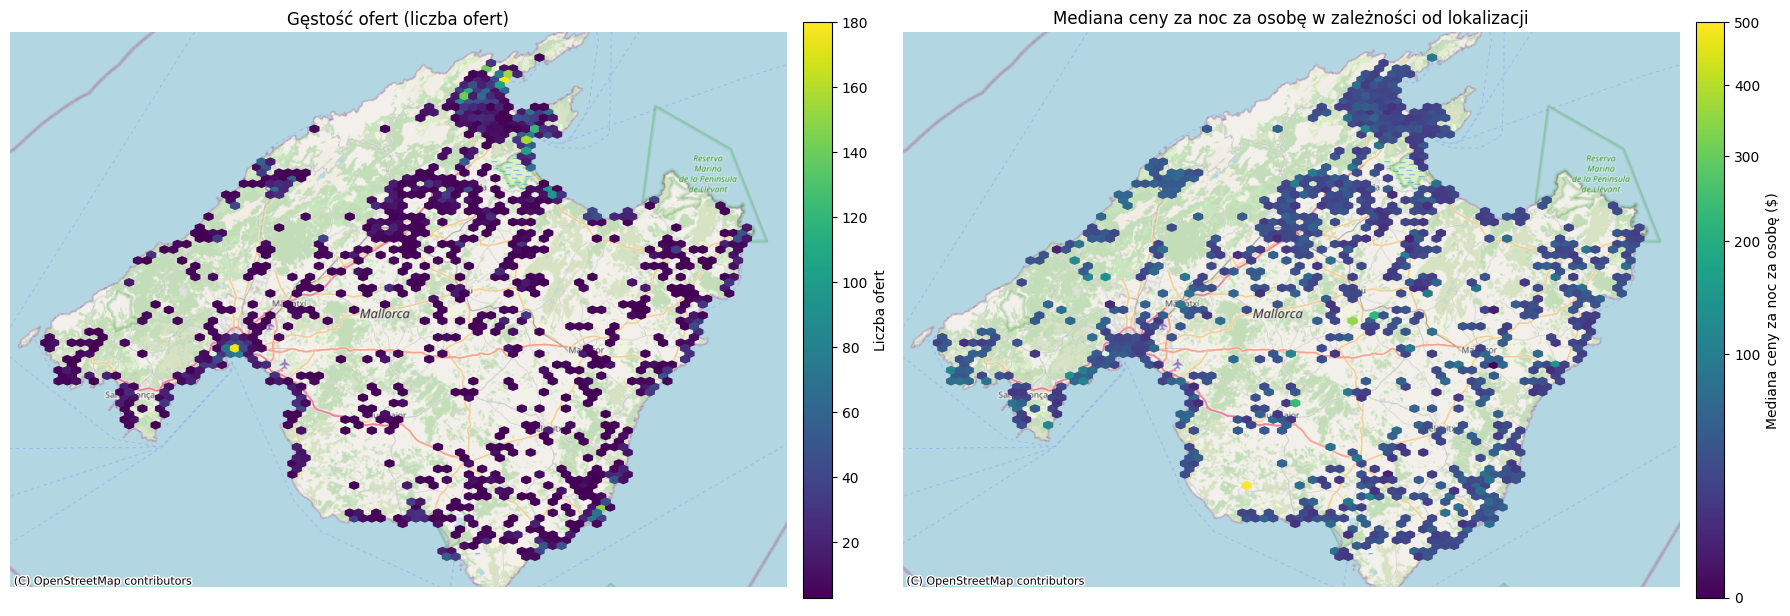

In [14]:
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as cx
from matplotlib import colors

minimum_offers_in_hex = 3

geo = df_clean.dropna(
    subset=["latitude", "longitude", "price_numeric", "accommodates"]
).copy()
geo["price_per_person"] = geo["price_numeric"] / geo["accommodates"]

gdf = gpd.GeoDataFrame(
    geo,
    geometry=gpd.points_from_xy(geo["longitude"], geo["latitude"]),
    crs="EPSG:4326",
).to_crs(epsg=3857)

x = gdf.geometry.x.to_numpy()
y = gdf.geometry.y.to_numpy()
p = gdf["price_per_person"].to_numpy()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

hb1 = ax1.hexbin(x, y, gridsize=80, mincnt=minimum_offers_in_hex)
cx.add_basemap(ax1, source="OpenStreetMap.Mapnik", alpha=0.9)
ax1.set_axis_off()
ax1.set_aspect("equal", adjustable="box")
ax1.set_title("Gęstość ofert (liczba ofert)")

cbar1 = fig.colorbar(hb1, ax=ax1, fraction=0.035, pad=0.02)
cbar1.set_label("Liczba ofert")

norm = colors.PowerNorm(gamma=0.5)
hb2 = ax2.hexbin(
    x,
    y,
    C=p,
    reduce_C_function=np.median,
    gridsize=80,
    mincnt=minimum_offers_in_hex,
    norm=norm,
)
cx.add_basemap(ax2, source="OpenStreetMap.Mapnik", alpha=0.9)
ax2.set_axis_off()
ax2.set_aspect("equal", adjustable="box")
ax2.set_title("Mediana ceny za noc za osobę w zależności od lokalizacji")

cbar2 = fig.colorbar(hb2, ax=ax2, fraction=0.035, pad=0.02)
cbar2.set_label("Mediana ceny za noc za osobę ($)")

plt.tight_layout()
plt.show()

Rozmieszczenie ofert w otrzymanych danych nie różni się znacząco od rozkładu zaobserwowanego w ramach etapu pierwszego, ponownie prezentując wyraźną nierównomierność przestrzenną. Największa koncentracja ogłoszeń występuje w północnej oraz we wschodniej części wyspy, ze szczególnym uwzględnieniem aglomeracji Palmy de Mallorca oraz kurortów wzdłuż północnego wybrzeża. Widoczne są również mniejsze klastry w zachodniej części wyspy. Centrum Majorki, charakteryzujące się górzystym terenem, wyróżnia się praktycznie brakiem ofert. Otrzymane dane sensownie odzwierciedlają zatem turystyczny charakter rynku.

Przestrzenny rozkład cen prezentuje umiarkowane zróżnicowanie. Duża część lokalizacji w najbardziej popularnych regionach mieści się w przedziale 100-200$ za noc. Nie występują wyraźne tendencje bezpośrednio pokazujące zależność ceny za noc za osobę od współrzędnych geograficznych (np. "lokale na północy są zazwyczaj droższe") - brak na wykresie wyraźnych dużych stref geograficznych o konsekwentnie wyższych cenach. Dużo bardziej potencjalnie interesującą informacją w porównaniu do czystej długości i szerokości geograficznej stanowi informacja o dzielnicy, w jakiej znajduje się nieruchomość. Drugi wykres sugeruje wzrost cen w pobliżu gmin takich jak Deià (zachód wyspy), Andratx (południowy zachód) czy Felanitx (południowy wschód). Biorąc pod uwagę kompleksowość uwzględnienia długości i szerokości geograficznej w modelu mimo realnie znikomego zysku, sama informacja o współrzędnych geograficznych nieruchomości ponownie nie wydaje się oferować dobrego stosunku wartości predykcyjnej do złożoności implementacji. Dobrym kandydatem jest jednak kolumna `neighbourhood_cleansed`, wskazująca gminę lub dzielnicę, w której znajduje się nieruchomość. Aby potwierdzić te obserwacje, w następnym rozdziale notatnika przeprowadzono analizę zależności ceny od dzielnicy.

Mniej intuicyjnymi, ale potencjalnie cennymi atrybutami mogą być informacje o bardziej technicznym charakterze, opisujące ograniczenia długości pobytu, dostępność lokalu w czasie oraz skalę działalności gospodarza.

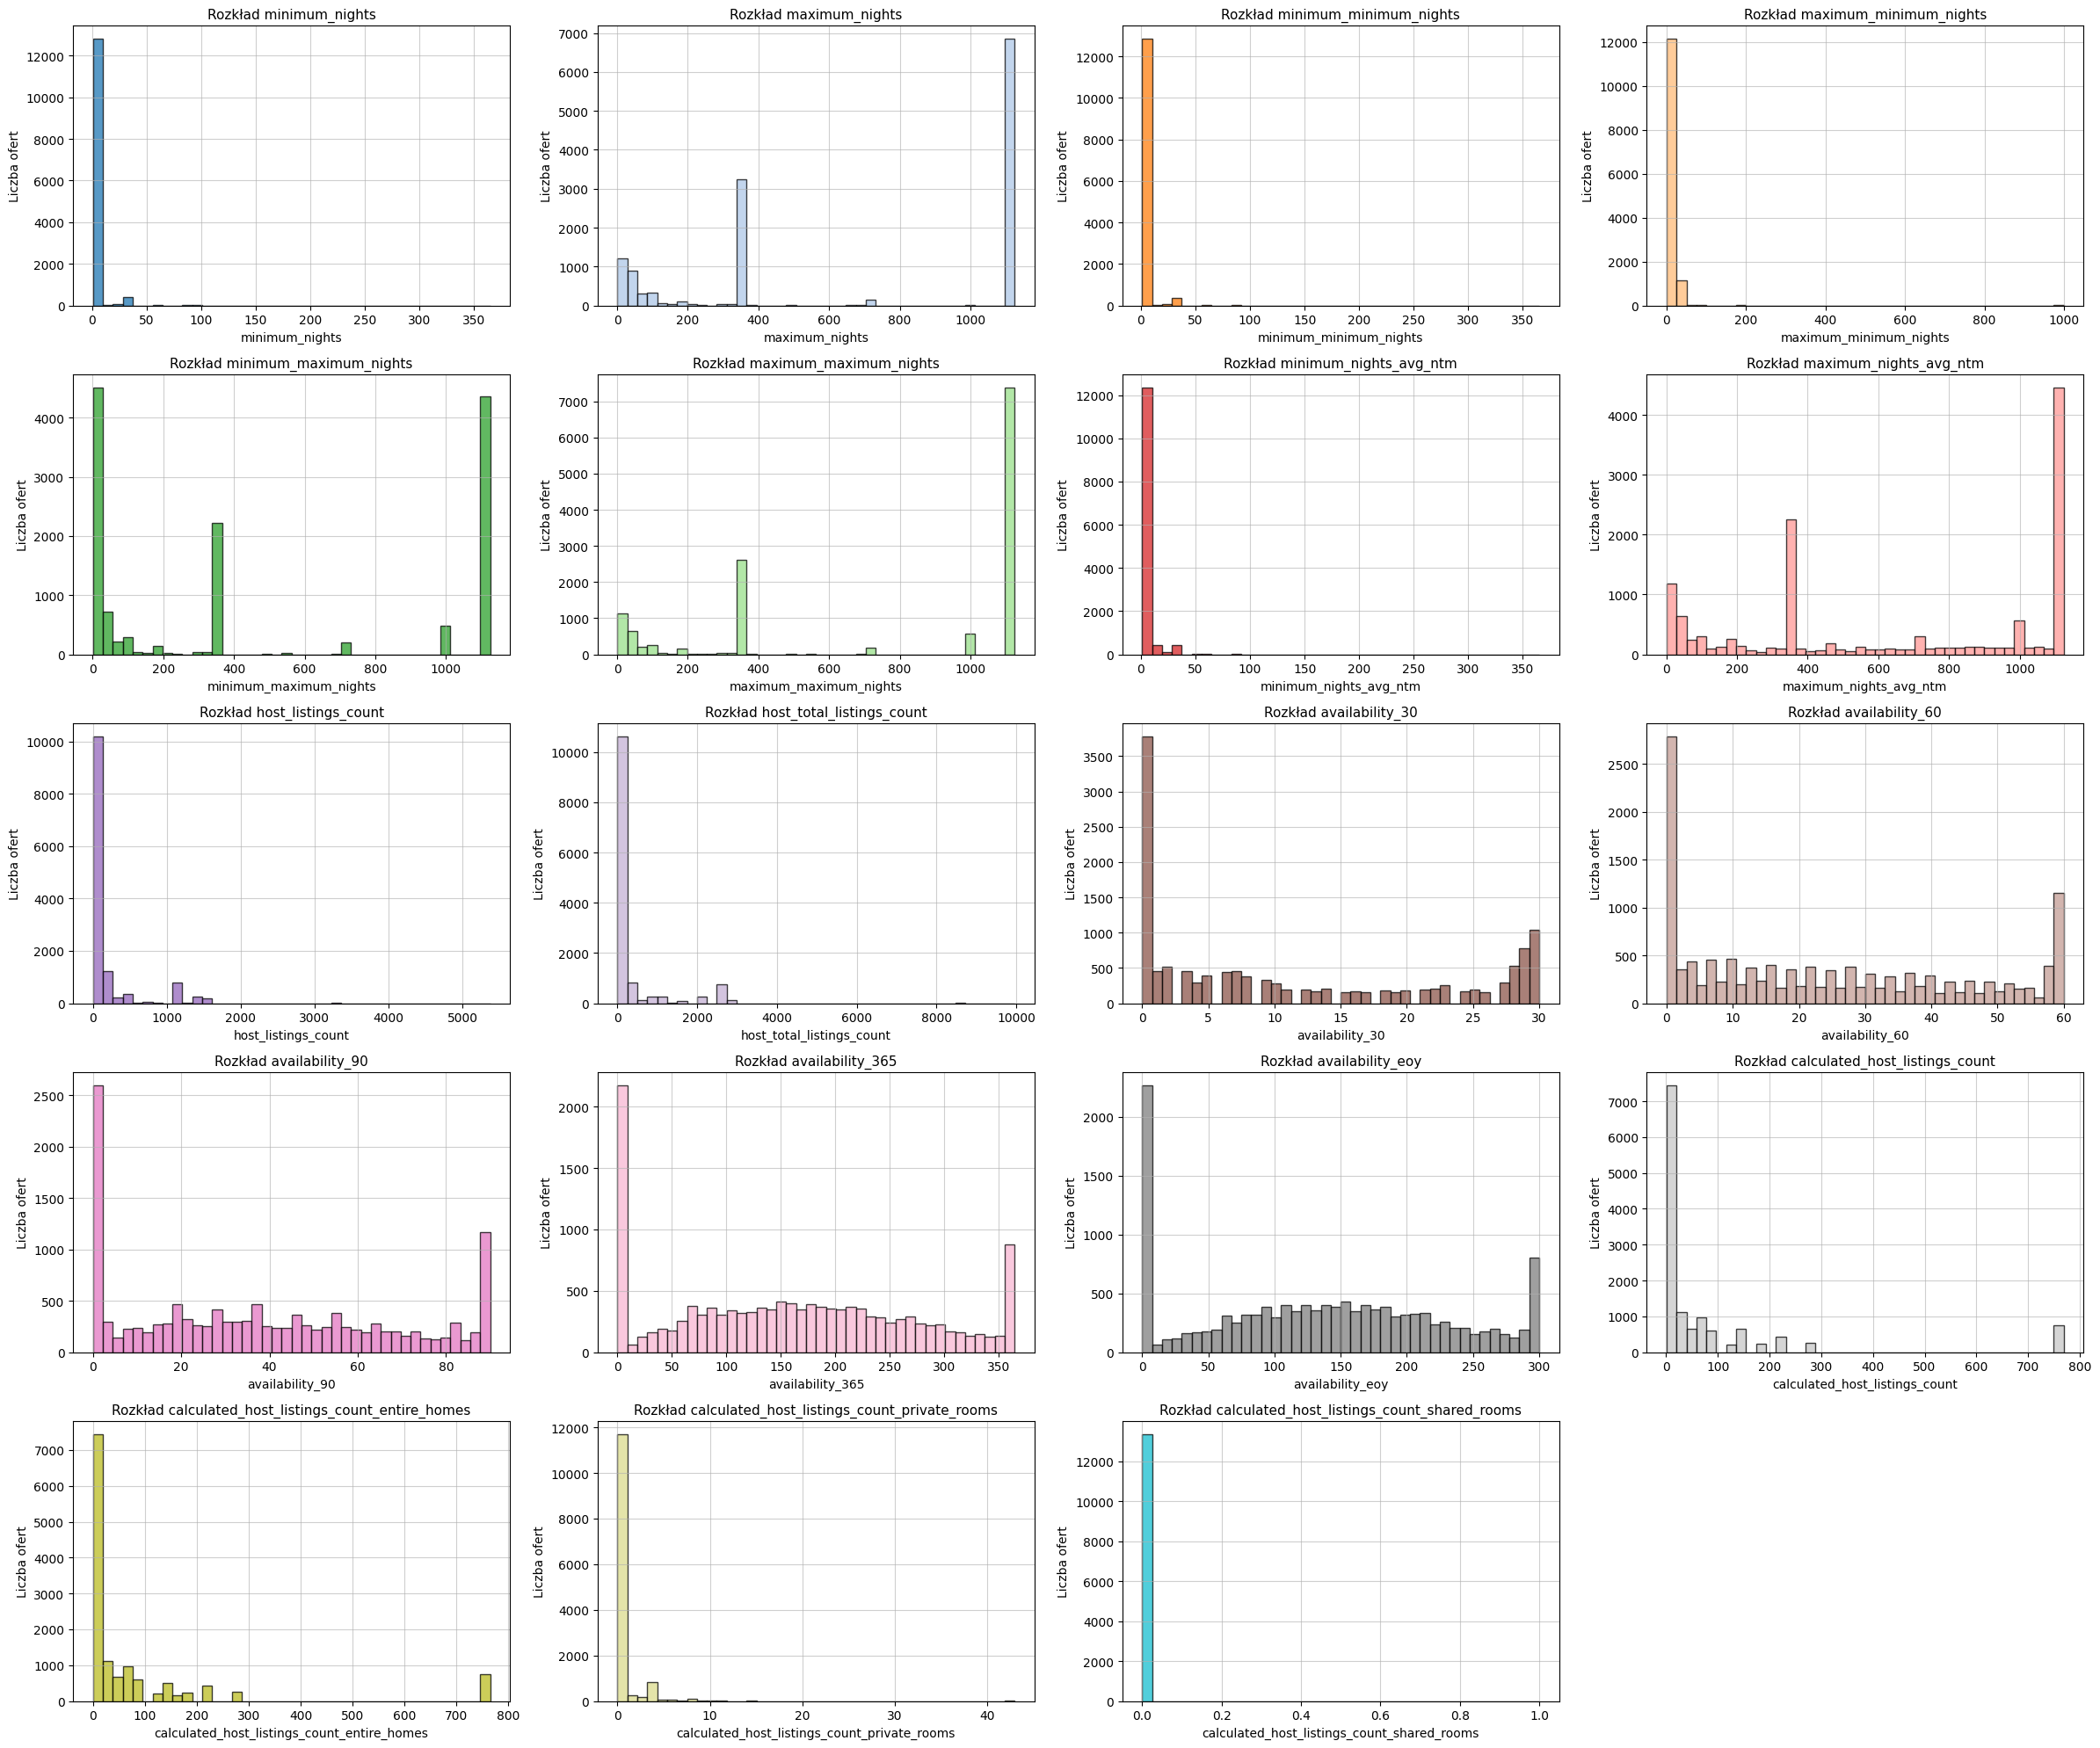

In [15]:
dist_cols = [
    "minimum_nights",
    "maximum_nights",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "host_listings_count",
    "host_total_listings_count",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "availability_eoy",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
]

n_cols = 4
n_rows = int(np.ceil(len(dist_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(24, 4 * n_rows))
axes = axes.flatten()

for ax, col, color in zip(axes, dist_cols, plt.cm.tab20.colors):  # type: ignore
    data = pd.to_numeric(df_clean[col], errors="coerce").dropna()

    ax.hist(data, bins=40, color=color, edgecolor="black", alpha=0.75)
    ax.set_title(f"Rozkład {col}", fontsize=11)
    ax.set_xlabel(col)
    ax.set_ylabel("Liczba ofert")
    ax.grid(alpha=0.6)

for ax in axes[len(dist_cols) :]:
    ax.axis("off")

plt.tight_layout()
plt.show()

Rozkłady zmiennych "technicznych" w nowych danych wyraźnie wykazują te same problemy co dane wykorzystywane w ramach etapu pierwszego, ponownie ukazując częstą obecność wartości skrajnych. Często pojawiajace się w kolumnach związanych z ograniczeniami długości pobytu wartości przekraczające 100 sugerują, iż gospodarze często oznaczają w taki sposób oferty z praktycznie nieograniczonym maksymalnym czasem pobytu - takie oferty nie odzwierciedlają bezpośrednio rzeczywistych charakterów rezerwacji. Rozkłady zmiennych opisujących skalę działalności gospodarzy wykazuje, iż zdecydowana większość gospodarzy posiada jedną lub kilka ofert, natomiast niewielka liczba hostów zarządza bardzo dużą liczbą lokali. Zmienne dostępności lokalu wykazują wyraźne skupienia przy wartościach skrajnych - widoczne są zarówno oferty niemal całkowicie dostępne, jak i takie, które są w dużym stopniu zarezerwowane. Zmienne te mają zatem charakter silnie asymetryczny. Ich ewentualne wykorzystanie w dalszym modelowaniu wymagałoby ostrożnej obróbki tychże cech przy stosunkowo niewielkim potencjalnym zysku, czynniki te zostaną zatem pominięte przy tworzeniu finalnego modelu predykcyjnego. 

### **Analiza zależności ceny od atrybutów**
Przedstawione w poprzednim rozdziale rozkłady wybranych atrybutów dobrze ilustrują najpopularniejsze typy oraz charakterystyczne cechy nieruchomości wynajmowanych na platformie Nocarz. Istotnym krokiem eksploracyjnej analizy danych jest jednak potwierdzenie korelacji między analizowanymi cechami a badaną zmienną docelową. Niniejszy rozdział skupia się na zbadaniu korelacji między ceną wynajmowanego lokalu za noc a wybranymi cechami opisującymi nieruchomość, politykę dostępności oraz charakterystykę gospodarza. W tym celu wykorzystano macierz korelacji Pearsona, umożliwiająca wstępną selekcję cech, które mogą mieć największą wartość predykcyjną. 

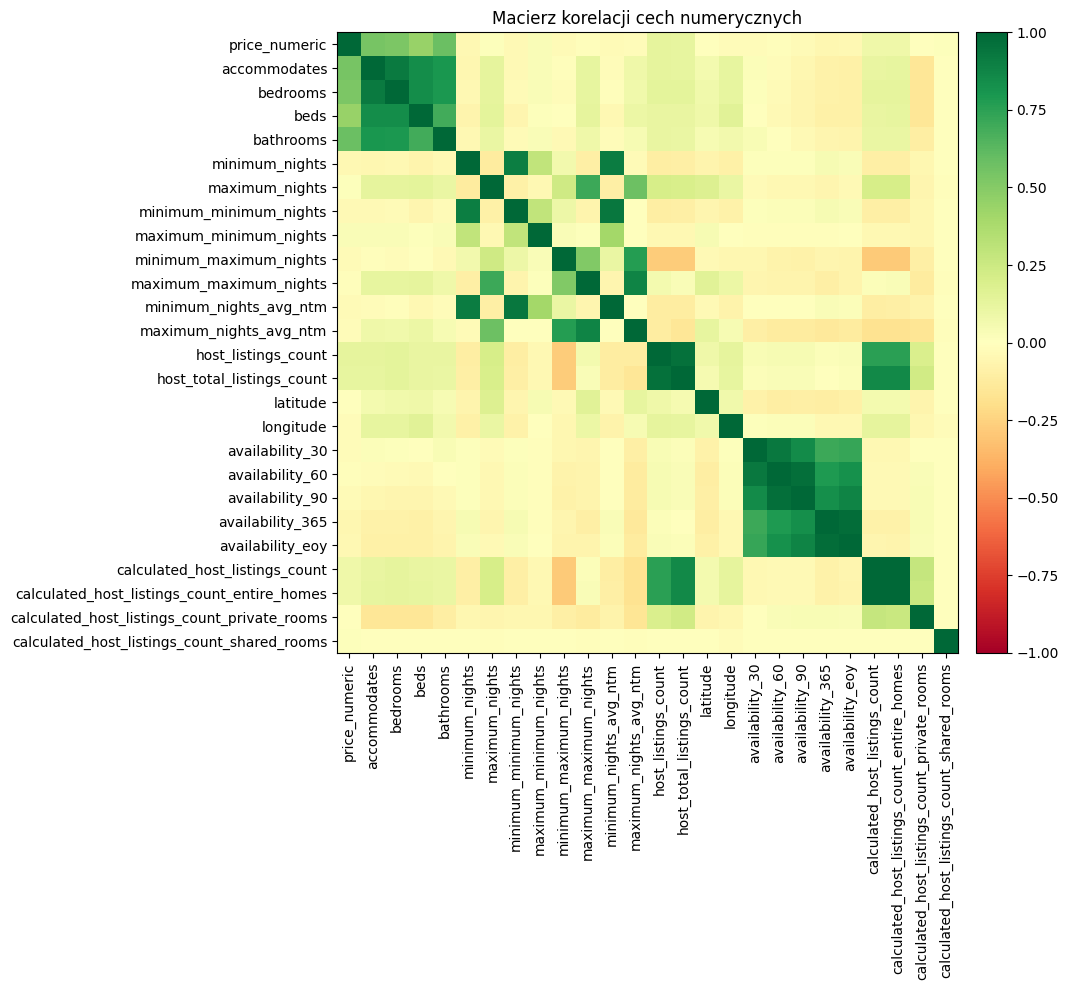

In [16]:
cols = [
    "price_numeric",
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "minimum_nights",
    "maximum_nights",
    "minimum_minimum_nights",
    "maximum_minimum_nights",
    "minimum_maximum_nights",
    "maximum_maximum_nights",
    "minimum_nights_avg_ntm",
    "maximum_nights_avg_ntm",
    "host_listings_count",
    "host_total_listings_count",
    "latitude",
    "longitude",
    "availability_30",
    "availability_60",
    "availability_90",
    "availability_365",
    "availability_eoy",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
]

plt.figure(figsize=(12, 10))
corr_matrix = df_clean[cols].corr()
im = plt.imshow(corr_matrix, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.035, pad=0.02)
plt.xticks(range(len(cols)), cols, rotation=90)
plt.yticks(range(len(cols)), cols)
plt.title("Macierz korelacji cech numerycznych")
plt.tight_layout()
plt.show()

Uzyskana macierz korelacji wskazuje na wyraźne, często dość intuicyjne zależności między ceną za noc a cechami opisującymi nieruchomość, identyczne do tych zaobserwowanych w ramach etapu pierwszego. Zdecydowanie najsilniej skorelowane są cechy opisujące "wielkość" lokalu, takie jak liczba łazienek, sypialni czy łóżek, a także maksymalna liczba gości. Znacznie niższe, często niemal zerowe korelacje obserwowane są w przypadku zmiennych opisujących ograniczenia długości pobytu oraz skalę działalności gospodarza. Sama liczba ofert bądź polityka maksymalnej bądź minimalnej liczby nocy nie wpływa zatem bezpośrednio na cenę za pojedynczą noc. 

In [17]:
numeric_cols = [
    "accommodates",
    "bedrooms",
    "beds",
    "bathrooms",
    "minimum_nights",
    "maximum_nights",
    "number_of_reviews",
    "host_listings_count",
    "host_total_listings_count",
]

corr_df = (
    pd.DataFrame(
        {
            "feature": numeric_cols,
            "correlation": [
                pd.to_numeric(df_clean[col], errors="coerce").corr(
                    df_clean["price_numeric"]
                )
                for col in numeric_cols
            ],
        }
    )
    .set_index("feature")
    .sort_values("correlation", ascending=False)
)

corr_df.style.background_gradient(
    cmap="RdYlGn",
)

,correlation
feature,
bathrooms,0.585041
accommodates,0.544404
bedrooms,0.527156
beds,0.443374
host_listings_count,0.129922
host_total_listings_count,0.121007
maximum_nights,0.009896
minimum_nights,-0.044628
number_of_reviews,-0.170284


Przedstawiona analiza korelacji ponownie wyraźnie pokazuje, iż kluczowymi determinantami ceny są przede wszystkim pojemność i "wielkość" nieruchomości - liczba łazienek, sypialni i łóżek. Ograniczenia długości pobytu (`minimum_nights`, `maximum_nights`) oraz skala działalności gospodarza (`host_listings_count`, `host_total_listings_count`) nie wpływają raczej bezpośrednio na cenę za noc i mają marginalne znaczenie w kontekście zadania. Warto również zauważyć, iż popularne, często rezerwowane lokale są raczej tańsze (korelacja kolumny `number_of_reviews` jest ujemna) - kolumna ta nie będzie jednak wykorzystywana w dalszych fazach modelowania. Fundamentalne założenie projektu stanowi bowiem, iż szacowana cena wyznaczana jest dla nowej oferty, która nie zawiera jeszcze recenzji ani informacji o popularności oferty. 



In [18]:
top_amenities = amenities_exploded.value_counts().head(50)
top_amenity_names = top_amenities.index.tolist()
df_clean_am = df_clean.copy()

for amenity in top_amenity_names:
    df_clean_am[f"amenity_{amenity}"] = df_clean_am["amenities_list"].apply(
        lambda x: int(amenity in x)
    )

amenity_corr = (
    pd.DataFrame(
        {
            "amenity": top_amenity_names,
            "correlation": [
                df_clean_am[f"amenity_{am}"].corr(df_clean_am["price_numeric"])
                for am in top_amenity_names
            ],
        }
    )
    .set_index("amenity")
    .sort_values("correlation", ascending=False)
)


amenity_corr[
    amenity_corr["correlation"].abs() > 0.05
].style.background_gradient(cmap="RdYlGn")

,correlation
amenity,
BBQ grill,0.217824
Dishwasher,0.179801
Pool,0.135996
Free parking on premises,0.128205
Barbecue utensils,0.119123
Bathtub,0.115786
Indoor fireplace,0.113770
Backyard,0.091782
Smoke alarm,0.088058


Korelacje między najpowszechniejszym iwskazywanymi przez gospodarzy udogonieniami a ceną wynajem różnież nie uległy większym zmianom. Spośród 50 najpopularniejszych udogodnień wskazywanych w ofertach nieruchomości, 27 z nich wykazuje bezwzględną wartość korelacji powyżej progu 0.05. Wysokie dodatnie korelacje odnotowano m.in. dla grilla oraz basenu (kolejno ≈0.22 oraz ≈0.14), które rzeczywiście stanowią udogodnienie "klasy premium" na rynku turystycznym i mogą mieć wpływ na postrzeganie wartości wynajmu przez klientów. Słabsze korelacje zaobserwowano m.in. dla wanny czy kominka. Ujemną korelację z ceną wykazują udogodnienia takie jak "wieszaki" czy "darmowy parking na ulicy", stanowiące podstawowe elementy wyposażenia, typowe dla tańszych ofert. W przeciwieństwie do cech charakteryzujących "wielkość" nieruchomości nie zaobserwowano bardzo wysokich korelacji wśród udogodnień, sugerując, iż pojedyncze elementy wyposażenia nieruchomości nie determinują cen za noc w izolacji. Na podstawie tego fragmentu analizy zadecydowano, iż udogodnieniami branymi pod uwagę w fazie budowy modelu będą grill BBQ, basen, zmywarka, bezpłatny parking na terenie posesji, akcesoria do grillowania, wanna, kominek wewnętrzny, dodatkowe poduszki i koce oraz bezpłatny parking przy ulicy.

Dane o właścicielu również mogą stanowić istotne zmienne predykcyjne. Kolumna `is_superhost` zawiera informację, czy host otrzymał status superhost, przyznawany przez serwis Nocarz za wysoką jakość obsługi, który w rezultacie może prowadzić do podwyższenia cen przez gospodarza uzasadniającego taką decyzję wysokim zaufaniem, jakim darzą go goście. W ramach następnych etapów implementacji warto również rozważyć wpływ czynników takich jak responsywność hosta (`host_response_time`, `host_response_rate`), a także liczbie ofert oferenta na platformie (`host_listings_count` oraz `host_total_listings_count`). Kolumny te mogą świadczyć o profesjonalizmie oraz zaangażowaniu oferenta, zwiększając jego zaufanie wśród gości.

Kolumny zawierające informację dotyczące recenzji oraz ocen wystawianych na platformie ofert (takie jak `number_of_reviews_ltm`, `review_scores_cleanliness` czy `reviews_per_month`), a także metryk opisujących obłożenie lokalu (jak `estimated_occupancy_l365d`, szacująca liczbę dni zajętości lokalu w ciągu ostatnich 365 dni), nie będą stanowiły atrybutów wykorzystywanych przez model. Fundamentalne założenie projektu stanowi, iż szacowana cena wyznaczana jest dla nowej oferty, która nie zawiera jeszcze recenzji ani informacji o popularności oferty. Dane techniczne, takie jak kolumny `scrape_id`, `last_scraped` czy kolumny zawierające adresy URL jak `host_thumbnail_url`, również nie będą wykorzystywane jako cechy w modelu predykcyjnym.


In [19]:
df_clean.groupby("host_is_superhost")["price_numeric"].agg(
    ["count", "mean", "median"]
)

,count,mean,median
host_is_superhost,,,
f,9824,269.627239,197.0
t,3377,236.708617,177.0


W przypadku potencjalnie cennych atrybutów kategorycznych, dla których klasyczna analiza korelacji nie ma bezpośredniego zastosowania, przedstawiono analizę porównawczą rozkładów ceny w zależności od wartości danej cechy. Analiza zmiennej `host_is_superhost` pokazuje, iż oferty prowadzone przez gospodarzy bez statusu superhosta cechują się wyższą średnią ceną za noc (≈270$) niż oferty superhostów (≈237$). Na podstawie tych obserwacji zadecydowano, iż atrybut ten zostanie wykorzystany w finalnej fazie modelowania.

In [20]:
df_clean.groupby("neighbourhood_cleansed")["price_numeric"].agg(
    ["count", "mean", "median"]
).sort_values("mean", ascending=False)

,count,mean,median
neighbourhood_cleansed,,,
Deyá,72,470.347222,413.0
Esporles,46,396.804348,348.5
Andratx,176,369.170455,245.5
Marratxí,86,367.953488,300.0
Bunyola,64,350.859375,290.5
Calvià,394,334.307107,190.5
Felanitx,468,328.350427,243.0
Algaida,74,297.472973,227.5
Valldemossa,82,295.097561,206.5


Silne zróżnicowanie widoczne jest w obserwacji zależności ceny za noc od lokalizacji (`neighborhood_cleansed`), potwierdzając obserwacje z poprzedniego rozdziału. Najwyższe wartości średnich cen noclegów rzeczywiście zaobserwowano w dzielnicach takich jak Deyá, Andratx, Felanitx oraz Esporles. Wyraźnie najniższe ceny, cechujące się medianą dużo niższą od mediany całkowitej ($193), występują w stolicy wyspy, Palma de Mallorca. Uzyskane dane wskazują zatem na istotny wpływ dzielnicy na poziom cen, potwierdzając zasadność uwzględnienia zmiennej opisującej dzielnicę, w której znajduje się nieruchomość, w dalszym modelowaniu. 

## **Modelowanie**
W ramach fazy modelowania wytrenowano dwa modele predykcji cen noclegów. Pierwszy, model bazowy, stanowi model regresji liniowej wykorzystujący podstawowe cechy nieruchomości, jak miało to miejsce w fazie modelowania wstępnego w etapie pierwszym. Modelem zaawansowanym jest natomiast model random forest, wykorzystujący do predykcji dodatkowo informację o obecności w nieruchomości dziewięciu najbardziej wpływowych udogodnień. Kod umożliwiający trenowanie obu modeli znajduje się w pliku `app/scripts/train.py` w repozytorium projektowym.

Kod implementuje pipeline trenowania, strojenia oraz zapisywania dwóch modeli predykcji cen noclegów - modelu bazowego (regresja liniowa) oraz modelu zaawansowanego (random forest), zaczynając od wczytania, konwertowania i filtrowania danych. W ramach przetwarzania danych następuje również ekstrakcja informacji o udogodnieniach, tworząc dziewięć binarnych zmiennych odpowiadających obecności najbardziej wpływowych udogodnień w nieruchomości. Dla cech numerycznych wykorzystywana jest imputacja medianą, natomiast dla cech kategorycznych następuje imputacja najczęstszej wartości oraz kodowanie one-hot. Dla obu modeli dane dzielone są na zbiór treningowy i testowy w proporcji 80/20. Ocena jakości modeli realizowana jest w funkcji `evaluate_model`, która oblicza standardowe metryki regresyjne - MAE, RMSE oraz $R^2$, a prz tym raportuje błąd MAE w relacji do średniej ceny w zbiorze testowym. Wybór finalnego modelu random forest oparto o procedurę strojenia hiperparametrów z użyciem GridSearchCV, w ramach której jako funkcję celu przyjęto minimalizację błędu MAE. W wyniku tego procesu zwracany jest najlepszy estymator, uznany za finalny model zaawansowany. Oba modele zapisywane są do katalogu pickle jako pliki `baseline_model.pkl` oraz `advanced_model.pkl`. Dodatkowo tworzony jest plik `model_metadata.pkl`, zawierający listę wykorzystywanych cech, metryki jakości, typ modelu oraz (dla modelu zaawansowanego) listę śledzonych udogodnień.

| Model                                      |        MAE |       RMSE | MAE (rel.) |         R² |
| ------------------------------------------ | ---------: | ---------: | ---------: | ---------: |
| Etap 1: Model naiwny (średnia)             |     149.81 |     217.95 |     57.29% |    -0.0000 |
| Etap 1: Model naiwny (mediana)             |     136.60 |     228.12 |     52.24% |    -0.0955 |
| Etap 1: Grupowanie po dzielnicy            |     145.56 |     213.87 |     55.67% |     0.0372 |
| Etap 1: Regresja liniowa                   |     113.73 |     174.05 |     43.49% |     0.3623 |
| Etap 1: Random forest                      |     109.28 |     171.38 |     41.79% |     0.3818 |
| Etap 2: Model bazowy (regresja liniowa)    |     111.00 |     172.43 |     41.65% |     0.4170 |
| Etap 2: Model zaawansowany (random forest) | **101.71** | **163.02** | **38.16%** | **0.4789** |

Wyniki uzyskane w etapie 2 potwierdzają zasadność rozszerzenia procesu modelowania względem podejść zastosowanych w etapie 1. Model bazowy oparty na regresji liniowej osiąga wyraźnie lepsze rezultaty niż jego odpowiednik z etapu 1, co przejawia się zarówno spadkiem błędu MAE (z ok. 113,7 do 111 dolarów), jak i zauważalnym wzrostem współczynnika determinacji $R^2$ do poziomu 0,42 - uzyskany model wyraźnie lepiej wykorzystuje dostępne cechy i jest w stanie wyjaśnić większą część zmienności cen.

Jeszcze wyraźniejszą poprawę jakości predykcji zapewnia model zaawansowany wykorzystujący las losowy, wykorzystujący informację o obecności najważniejszych udogodnień. W porównaniu z najlepszym modelem z etapu 1, uzyskano dalszą redukcję MAE do poziomu ok. 101,7 dolarów oraz spadek błędu względnego poniżej 40% średniej ceny. Jednocześnie współczynnik $R^2$ wzrasta do wartości bliskiej 0,48, co wskazuje na istotnie lepsze dopasowanie modelu do danych.

Oba uzyskane modele spełniają zatem przyjęte w ramach etapu pierwszego kryteria sukcesu, osiągając wartość współczynnika $R^2$ powyżej progu 0,4. Jednocześnie, model zaawansowany spełnai dodatkowe kryterium sukcesu, cechując się względnym MAE w przedziale 35-40% średniej ceny za noc. Główne techniczne kryteria sukcesu uznane zostały za osiągnięte.

## **Podsumowanie**

W ramach drugiego etapu projektu potwierdzono, iż zaktualizowany zbiór danych charakteryzuje się wyższą jakością oraz większą liczebnością obserwacji, przy jednoczesnym zachowaniu kluczowych zależności i trendów zidentyfikowanych w etapie pierwszym. Umożliwiło to bezpośrednie przeniesienie wcześniejszych założeń analitycznych i skoncentrowanie się na rozbudowie procesu modelowania, bez konieczności redefinicji podstawowych hipotez dotyczących struktury danych i czynników wpływających na ceny noclegów za noc.

W fazie modelowania zbudowano dwa pipeline’y predykcyjne - model bazowy oparty na regresji liniowej oraz model zaawansowany, wykorzystujący algorytm random forest i rozszerzony zestaw cech obejmujący obecność kluczowych udogodnień. Zastosowanie ustandaryzowanego przetwarzania danych oraz uprzednio wybranych, obiektywnych metryk ewaluacyjnych pozwoliło na rzetelne porównanie jakości modeli. Dodatkowo, wykorzystanie GridSearchCV do strojenia hiperparametrów lasu losowego umożliwiło wybór konfiguracji najlepiej generalizującej dane.

Uzyskane wyniki jednoznacznie wskazują na poprawę jakości predykcji względem modeli z etapu pierwszego. Zarówno model bazowy, jak i zaawansowany spełniają przyjęte kryteria sukcesu, osiągając współczynnik $R^2$ powyżej 0,4, natomiast model zaawansowany dodatkowo charakteryzuje się istotnie niższym błędem względnym. W konsekwencji oba utworzone w tym kroku modele uznane zostały za finalne modele etapu drugiego, wykorzystywane w mikroserwisie predykcyjnym w następnej części implementacji projektu.